<a href="https://colab.research.google.com/github/booorayan/fin_inclusion_pj/blob/master/Financial_Inclusion_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Individuals Most Likely To Have or Use a Bank Account

## Importing Libraries to be Used

In [0]:
# Import pandas library
import pandas as pd

# Import numpy library
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns

%matplotlib inline

## Loading the dataset

In [44]:
# loading the dataset and previewing the first 5 observations
url = 'http://bit.ly/FinancialDataset'

fin = pd.read_csv(url)
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [45]:
# checking the columns in the dataset

fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [46]:
# checking the size of dataframe
fin.shape

(23524, 13)

In [47]:
# checking the datatypes of the different columns

fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## Tidying the Dataset/Data Cleaning

In [48]:
# replacing spaces in column names with underscores and converting all column names to lowercase for uniformity
fin.columns = fin.columns.str.lower().str.replace(' ', '_')
fin.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
# renaming some column names 
fin.rename({'the_relathip_with_head': 'rltshp_with_head', 'type_of_job':'job_type', 'level_of_educuation': 'education_level', 'has_a_bank_account':'has_bank_account', 'type_of_location':'location', 'cell_phone_access': 'cellphone_access'}, axis=1, inplace=True)

In [50]:
fin.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'rltshp_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [51]:
# checking for missing values
fin.isnull().sum()


country                 14
year                     0
uniqueid                 0
has_bank_account        36
location                15
cellphone_access        11
household_size          28
respondent_age          34
gender_of_respondent    34
rltshp_with_head         4
marital_status          32
education_level         29
job_type                30
dtype: int64

In [11]:
# summary descriptive report of the dataset

import pandas_profiling
pandas_profiling.ProfileReport(fin)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
# pandas profiling report revealed anomalies in the year column(i.e. 2029, 2039 and 2056)
# removing the anomalies from the year column

ind = fin[fin['year'] > 2018].index
ind

fin.drop(ind, inplace=True)

In [53]:
# confirming if the the anomalies have been dropped

fin.year.unique()

array([2018, 2016, 2017])

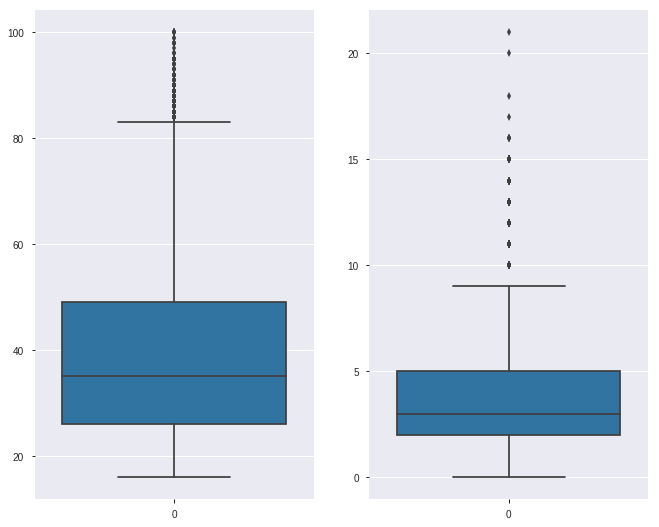

In [63]:
# checking for outliers in the numerical variables

finfig, axx = plt.subplots(1,2, figsize=(11,9))
sns.boxplot(data=fin['respondent_age'], ax=axx[0])
sns.boxplot(data=fin['household_size'], ax=axx[1])


## Univariate and Bivariate Analysis

In [55]:
# checking the descriptive statistics for the numerical variables

fin.describe()

,year,household_size,respondent_age
count,23521.000000,23493.000000,23487.000000
mean,2016.975894,3.681735,38.805850
std,0.847348,2.280024,16.520097
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


### Univariate Analysis

In [56]:
# handling missing values in the country column

fin['country'].isnull().sum()

14

In [0]:
fin['country'].fillna(method='ffill', inplace=True)

In [59]:
fin['country'].isnull().sum()

0

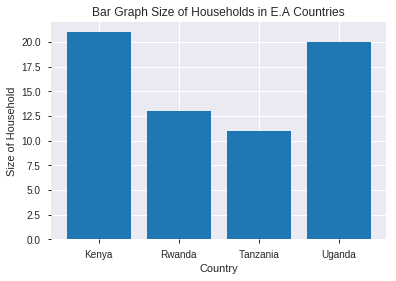

In [70]:
# bar chart analyzing the size of households in E.A countries

plt.bar(fin['country'], fin['household_size'])
plt.xlabel('Country')
plt.ylabel('Size of Household')
plt.title('Bar Graph Size of Households in E.A Countries')
plt.show()


In [72]:
# filing null values in the has bank account column with the mode
fin['has_bank_account'].fillna(fin['has_bank_account'].mode()[0], inplace=True)
fin['has_bank_account'].isnull().sum()

0

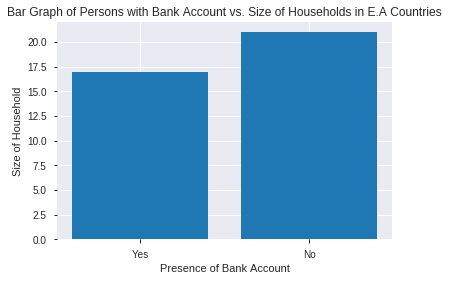

In [73]:
plt.bar(fin['has_bank_account'], fin['household_size'])
plt.xlabel('Presence of Bank Account')
plt.ylabel('Size of Household')
plt.title('Bar Graph of Persons with Bank Account vs. Size of Households in E.A Countries')
plt.show()

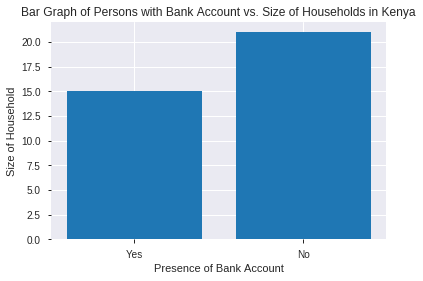

In [76]:
fnn = fin[fin['country'] == 'Kenya']
plt.bar(fnn['has_bank_account'], fnn['household_size'])
plt.xlabel('Presence of Bank Account')
plt.ylabel('Size of Household')
plt.title('Bar Graph of Persons with Bank Account vs. Size of Households in Kenya')
plt.show()

### Bivariate Analysis

In [32]:
# checking for the correlation between the variables household size and respondent age using corr()
fin['household_size'].corr(fin['respondent_age'])

# the correlation between the two variables is a negative weak correlation

-0.11967116034624833

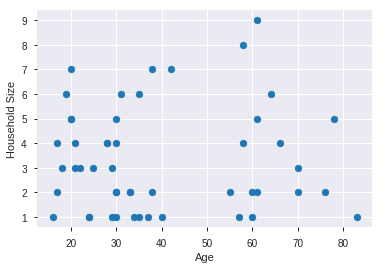

In [35]:
# using a scatter plot to check for correlation between household size and respondent age
fn = fin.sample(50)
plt.scatter(fn['respondent_age'], fn['household_size'])
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.show()